In [1]:
%matplotlib inline

import urllib3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Replace the IP address with the one for your printer
http = urllib3.PoolManager()
r = http.request('GET', 'http://192.168.0.151/api/v1/printer/diagnostics/temperature_flow/3000')

In [3]:
diagnostics = pd.read_json(r.data)
diagnostics.rename(columns={c:diagnostics.at[0,c] for c in diagnostics}, inplace=True)
diagnostics.drop(diagnostics.head(1).index, inplace=True)

In [4]:
diagnostics.head()

,Time,temperature0,target0,heater0,flow_sensor0,flow_steps0,temperature1,target1,heater1,flow_sensor1,flow_steps1,bed_temperature,bed_target,bed_heater,active_hotend_or_state
1,14941.4,205,205,134,0,0,39.7,0,0,0,0,59.4,60,135,0
2,14941.5,205,205,133,0,0,39.7,0,0,0,0,59.9,60,40,0
3,14941.7,205,205,133,0,0,39.7,0,0,0,0,60,60,87,0
4,14941.8,205.2,205,133,0,0,39.7,0,0,0,0,59.6,60,135,0
5,14941.9,205.2,205,132,0,0,39.7,0,0,0,0,59.3,60,158,0


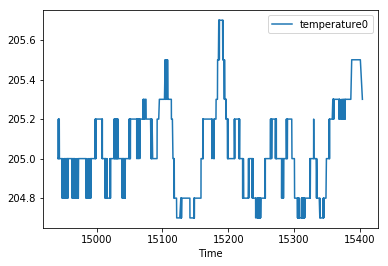

In [5]:
plt.figure()
diagnostics.plot(x='Time', y='temperature0')